필요한 모듈과 라이브러리들을 가져 옴

In [1]:
#import the libraries For data analysis 
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

matplotlib에서 한글이 깨지는 상황을 막기위해 코드 삽입

In [3]:
%matplotlib inline

import platform
path="c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() =='Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system')

이미 가지고 있는 교통사고, 인구, 범죄, 세금 데이터들을 가공해 만든 임의의 통합데이터를 사용함

In [4]:
#Load the convert data
total_data = pd.read_csv('./data/통합.csv', engine='python')
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 21 columns):
city_name        78 non-null object
district_name    78 non-null object
idx              78 non-null int64
year             78 non-null int64
city_idx         78 non-null int64
age              78 non-null object
total            78 non-null int64
total_out        78 non-null int64
total_m          78 non-null int64
total_w          78 non-null int64
in_m             78 non-null int64
in_w             78 non-null int64
out_m            78 non-null int64
out_w            78 non-null int64
out_per          78 non-null float64
suicide_rate     78 non-null float64
crimeRate        78 non-null float64
범죄수              78 non-null int64
CCTV             78 non-null int64
교통사망자            78 non-null int64
tax              78 non-null int64
dtypes: float64(3), int64(15), object(3)
memory usage: 12.9+ KB


In [5]:
total_data.head()

,city_name,district_name,idx,year,city_idx,age,total,total_out,total_m,total_w,...,in_w,out_m,out_w,out_per,suicide_rate,crimeRate,범죄수,CCTV,교통사망자,tax
0,서울특별시,서울,2185,2016,1,합계,9805506,335167,4799115,5006391,...,4833965,162741,172426,0.0342,19.8,0.000199,1950,44457,342,9549733230
1,인천광역시,인천,2263,2016,2,합계,2913024,71873,1465699,1447325,...,1417411,41959,29914,0.0247,23.2,0.000969,2824,8680,137,1853394506
2,제주특별자치도,제주,4343,2016,3,합계,623332,17476,314133,309199,...,301917,10194,7282,0.0280,21.0,0.005594,3487,2249,77,651379778
3,세종특별자치시,세종,2367,2016,4,합계,242507,4835,122648,119859,...,117907,2883,1952,0.0199,23.2,0.003629,880,1848,25,294869511
4,대전광역시,대전,2315,2016,5,합계,1535445,19687,770971,764474,...,754009,9222,10465,0.0128,22.6,0.001199,1841,6356,94,577589143


구분하기 편하게 district_name과 city_name을 합쳐 하나의 city 속성으로 하고

그 속성을 index로 변환

In [6]:
total_data['city'] = total_data['city_name'] +' ' +total_data['district_name']
total_data.set_index('city', inplace=True)

In [7]:
total_data.head()

,city_name,district_name,idx,year,city_idx,age,total,total_out,total_m,total_w,...,in_w,out_m,out_w,out_per,suicide_rate,crimeRate,범죄수,CCTV,교통사망자,tax
city,,,,,,,,,,,,,,,,,,,,,
서울특별시 서울,서울특별시,서울,2185,2016,1,합계,9805506,335167,4799115,5006391,...,4833965,162741,172426,0.0342,19.8,0.000199,1950,44457,342,9549733230
인천광역시 인천,인천광역시,인천,2263,2016,2,합계,2913024,71873,1465699,1447325,...,1417411,41959,29914,0.0247,23.2,0.000969,2824,8680,137,1853394506
제주특별자치도 제주,제주특별자치도,제주,4343,2016,3,합계,623332,17476,314133,309199,...,301917,10194,7282,0.0280,21.0,0.005594,3487,2249,77,651379778
세종특별자치시 세종,세종특별자치시,세종,2367,2016,4,합계,242507,4835,122648,119859,...,117907,2883,1952,0.0199,23.2,0.003629,880,1848,25,294869511
대전광역시 대전,대전광역시,대전,2315,2016,5,합계,1535445,19687,770971,764474,...,754009,9222,10465,0.0128,22.6,0.001199,1841,6356,94,577589143


여기서 필요한 정보를 제외하고는 삭제를 진행

전체 남성, 전체 여성 ,내국인 남성, 나이(합계라고만 표시됨), 외국인 여성, 외국인 남성 속성을 삭제

In [8]:
#delete the non_valueable
del total_data['age']
del total_data['total_m']
del total_data['total_w']
del total_data['in_m']
del total_data['in_w']
del total_data['out_m']
del total_data['out_w']

세금을 1인당 세금 비율로 계산

In [9]:
total_data['per_tax'] = total_data['tax'] / total_data['total']
total_data.head()

,city_name,district_name,idx,year,city_idx,total,total_out,out_per,suicide_rate,crimeRate,범죄수,CCTV,교통사망자,tax,per_tax
city,,,,,,,,,,,,,,,
서울특별시 서울,서울특별시,서울,2185,2016,1,9805506,335167,0.0342,19.8,0.000199,1950,44457,342,9549733230,973.915393
인천광역시 인천,인천광역시,인천,2263,2016,2,2913024,71873,0.0247,23.2,0.000969,2824,8680,137,1853394506,636.244159
제주특별자치도 제주,제주특별자치도,제주,4343,2016,3,623332,17476,0.0280,21.0,0.005594,3487,2249,77,651379778,1044.996532
세종특별자치시 세종,세종특별자치시,세종,2367,2016,4,242507,4835,0.0199,23.2,0.003629,880,1848,25,294869511,1215.921648
대전광역시 대전,대전광역시,대전,2315,2016,5,1535445,19687,0.0128,22.6,0.001199,1841,6356,94,577589143,376.170519


### Correlation Analysis

상관분석은 numpy 모듈의 corrcoef를 사용함

상관분석에서

절댓값 0.1 이하는 무시하고

절댓값 0.3 이하는 약한 상관관계를

절댓값 0.7 이하는 강한 상관관계를 나타낸다

우선은 범죄율과 다른 데이터들의상관관계를 분석

In [10]:
print('범죄율 / 교통사고사망자: ')
print(np.corrcoef(total_data['crimeRate'], total_data['교통사망자']))
print('범죄율 / 소득: ')
print(np.corrcoef(total_data['crimeRate'], total_data['per_tax']))
print('범죄율 / CCTV: ')
print(np.corrcoef(total_data['crimeRate'], total_data['CCTV']))
print('범죄율 / 범죄수: ')
print(np.corrcoef(total_data['crimeRate'], total_data['범죄수']))
print('범죄율 / 자살율: ')
print(np.corrcoef(total_data['crimeRate'], total_data['suicide_rate']))
print('범죄율 / 인구수: ')
print(np.corrcoef(total_data['crimeRate'], total_data['total']))
print('범죄율 / 외국인비율: ')
print(np.corrcoef(total_data['crimeRate'], total_data['out_per']))


범죄율 / 교통사고사망자: 
[[ 1.         -0.52747446]
 [-0.52747446  1.        ]]
범죄율 / 소득: 
[[ 1.         -0.11164779]
 [-0.11164779  1.        ]]
범죄율 / CCTV: 
[[ 1.         -0.47380649]
 [-0.47380649  1.        ]]
범죄율 / 범죄수: 
[[ 1.         -0.10569372]
 [-0.10569372  1.        ]]
범죄율 / 자살율: 
[[1.         0.31934957]
 [0.31934957 1.        ]]
범죄율 / 인구수: 
[[ 1.         -0.48023171]
 [-0.48023171  1.        ]]
범죄율 / 외국인비율: 
[[1.         0.05043242]
 [0.05043242 1.        ]]


그 다음은 인구수와 상관관계를 보려고 한다

In [11]:
print('인구수 / 교통사고사망자: ')
print(np.corrcoef(total_data['total'], total_data['교통사망자']))
print('인구수 / 범죄수: ')
print(np.corrcoef(total_data['total'], total_data['범죄수']))
print('인구수 / 자살율: ')
print(np.corrcoef(total_data['total'], total_data['suicide_rate']))
print('인구수 / 외국인비율: ')
print(np.corrcoef(total_data['total'], total_data['out_per']))


인구수 / 교통사고사망자: 
[[1.        0.9566749]
 [0.9566749 1.       ]]
인구수 / 범죄수: 
[[1.         0.34066104]
 [0.34066104 1.        ]]
인구수 / 자살율: 
[[ 1.         -0.17275661]
 [-0.17275661  1.        ]]
인구수 / 외국인비율: 
[[ 1.         -0.00892639]
 [-0.00892639  1.        ]]


### DATA Visualation

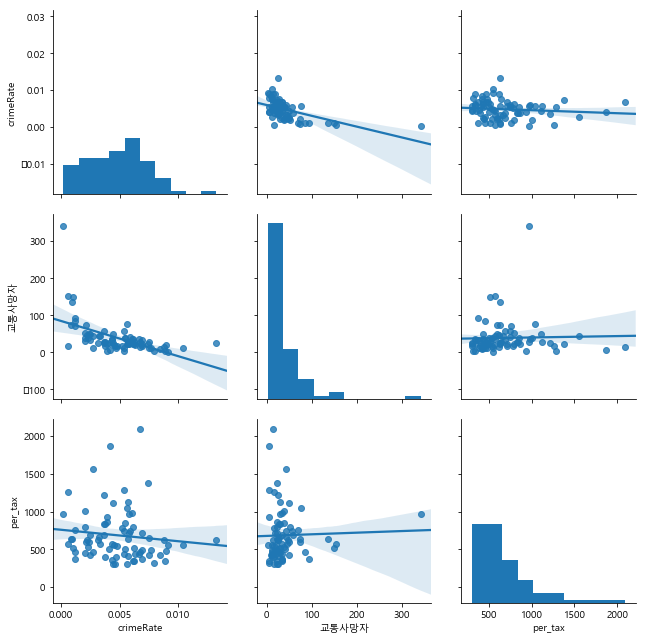

In [12]:
sns.pairplot(total_data, vars=["crimeRate", "교통사망자", "per_tax"], kind='reg', size=3)
plt.show()

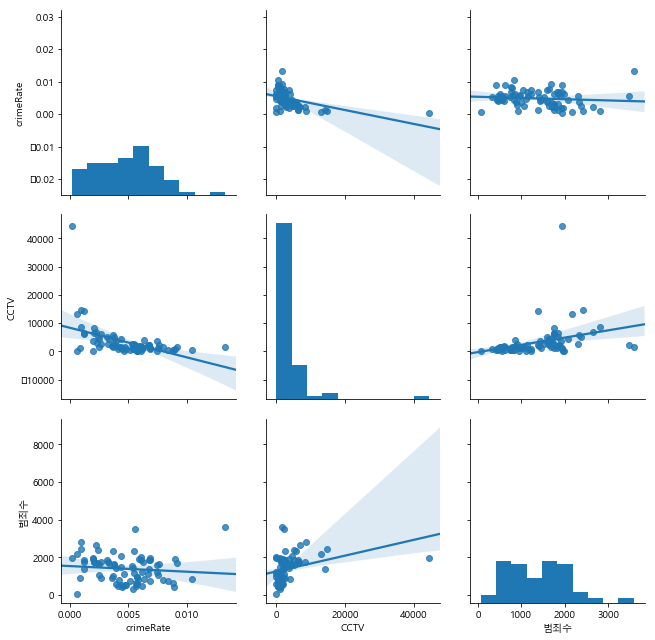

In [13]:
sns.pairplot(total_data, vars=["crimeRate",  "CCTV", "범죄수"], kind='reg', size=3)
plt.show()

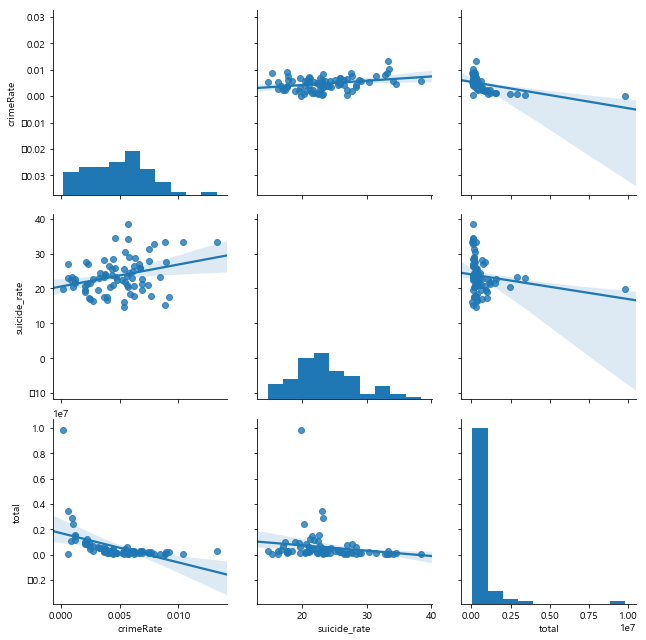

In [14]:
sns.pairplot(total_data, vars=["crimeRate", "suicide_rate", "total"], kind='reg', size=3)
plt.show()

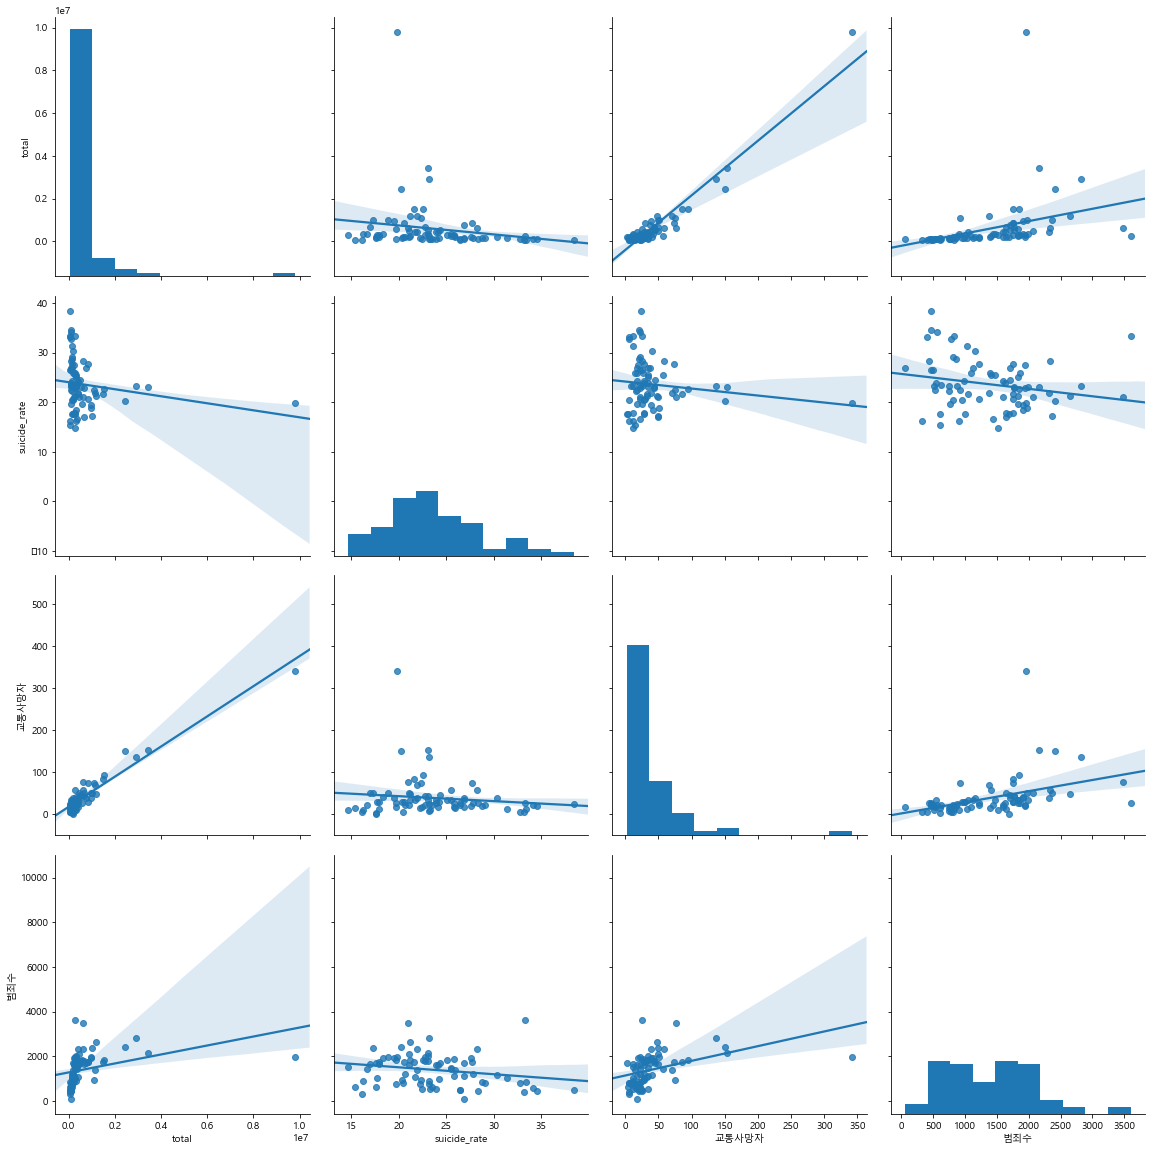

In [15]:
sns.pairplot(total_data, vars=["total", "suicide_rate", "교통사망자", "범죄수"], kind='reg', size=4)
plt.show()